In [110]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [83]:
data=pd.read_csv('Real estate.csv')

In [84]:
df=data.copy()

In [85]:
df.head(1)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9


In [86]:
df.columns = ["No","transaction date", "house age", "distance to the nearest MRT station","number of convenience stores","latitude","longitude","house price of unit area"]

In [87]:
df.head(2)

,No,transaction date,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2


<AxesSubplot:>

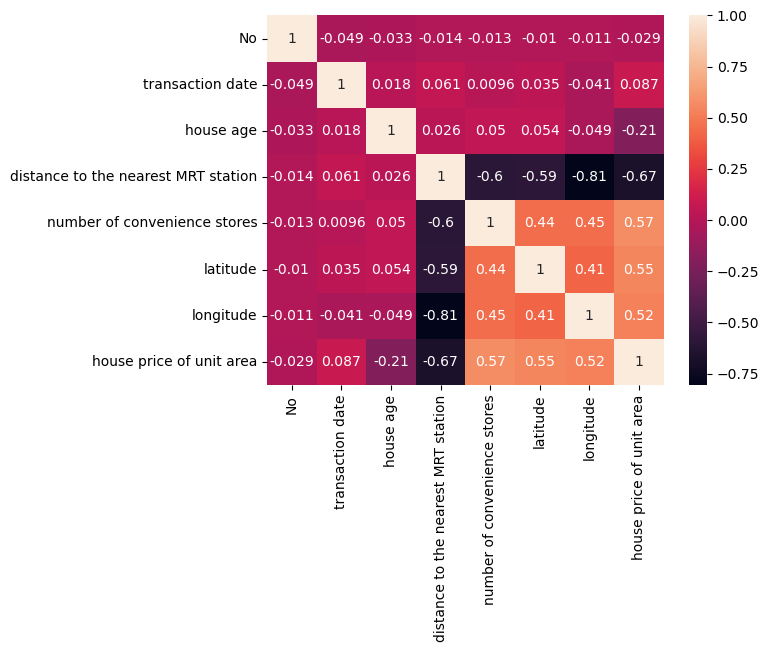

In [88]:
sns.heatmap(df.corr(), annot=True)

In [90]:
df.head(2)

,No,transaction date,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2


In [91]:
y=df['house price of unit area']

In [22]:
y

,house price of unit area
0,37.9
1,42.2
2,47.3
3,54.8
4,43.1
...,...
409,15.4
410,50.0
411,40.6
412,52.5


In [93]:
x=df.drop(['No','house price of unit area'],axis=1)

In [94]:
x

,transaction date,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude
0,2012.917,32.0,84.87882,10,24.98298,121.54024
1,2012.917,19.5,306.59470,9,24.98034,121.53951
2,2013.583,13.3,561.98450,5,24.98746,121.54391
3,2013.500,13.3,561.98450,5,24.98746,121.54391
4,2012.833,5.0,390.56840,5,24.97937,121.54245
...,...,...,...,...,...,...
409,2013.000,13.7,4082.01500,0,24.94155,121.50381
410,2012.667,5.6,90.45606,9,24.97433,121.54310
411,2013.250,18.8,390.96960,7,24.97923,121.53986
412,2013.000,8.1,104.81010,5,24.96674,121.54067


In [95]:
x.shape

(414, 6)

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   No                                   414 non-null    int64  
 1   transaction date                     414 non-null    float64
 2   house age                            414 non-null    float64
 3   distance to the nearest MRT station  414 non-null    float64
 4   number of convenience stores         414 non-null    int64  
 5   latitude                             414 non-null    float64
 6   longitude                            414 non-null    float64
 7   house price of unit area             414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [97]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [98]:
X_train.shape,X_test.shape,y_train.shape, y_test.shape

((310, 6), (104, 6), (310,), (104,))

In [99]:
model=LinearRegression()

In [100]:
model.fit(X_train,y_train)

LinearRegression()

In [101]:
model.coef_

array([ 5.88480311e+00, -2.66796932e-01, -4.98768211e-03,  1.12832133e+00,
        2.19404737e+02, -4.31314656e+01])

In [102]:
y_test

358    45.1
350    42.3
373    52.2
399    37.3
369    22.8
       ... 
63     55.0
261    24.4
297    28.5
113     7.6
248    22.3
Name: house price of unit area, Length: 104, dtype: float64

In [103]:
y_predict=model.predict(X_test)
y_predict

array([48.34291497, 41.54298944, 44.53794586, 40.48409279, 27.67033373,
       45.823322  , 44.7862509 , 46.66585125, 23.94700351, 55.01889411,
       34.665966  , 37.01204512, 37.48726957, 23.56891298, 35.58288799,
       34.85346316, 44.02519536, 45.92450123, 30.36228993, 44.49369322,
        0.68951997, 35.49232588, 48.50309604, 46.09387222, 11.54647841,
       39.94180883, 12.70525078, 43.06674508, 35.41110448, 37.51833233,
       13.45198939, 40.52373238, 35.52886105, 27.72673789, 46.77755831,
       31.5176578 , 51.28637309, 14.13282455, 49.80345661, 40.61276201,
       38.55643324, 40.97247923, 47.50031896, 37.67877991, 40.12514805,
       47.1300854 , 44.06003605, 20.31100788, 47.70642419, 45.78216452,
       48.83135363, 49.2251656 , 42.84724551, 43.07950786, 36.40530013,
       15.08890698, 37.28167845, 34.5687595 , 28.56717196, 46.17741259,
       33.48578763, 32.50577456, 15.08890698,  8.77769075, 10.44195523,
       34.53624345, 28.45922354, 47.20241706, 33.2290774 , 31.62

In [104]:
y_predict.shape

(104,)

<AxesSubplot:ylabel='house price of unit area'>

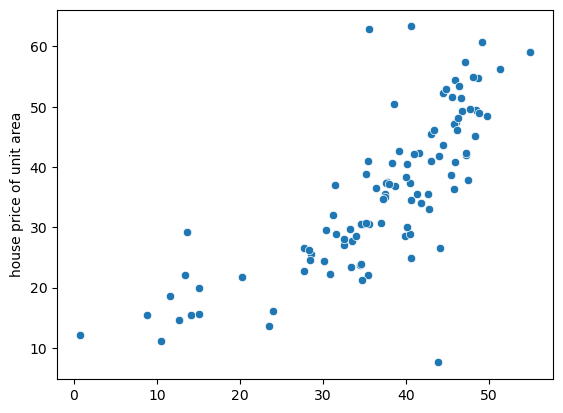

In [105]:
sns.scatterplot(y_predict,y_test)

In [106]:
pd.DataFrame({"True answer":y_test,"model_predicition":y_predict})

,True answer,model_predicition
358,45.1,48.342915
350,42.3,41.542989
373,52.2,44.537946
399,37.3,40.484093
369,22.8,27.670334
...,...,...
63,55.0,48.064912
261,24.4,30.155356
297,28.5,33.976413
113,7.6,43.912803


In [63]:
df.dtypes

No                                       int64
transaction date                       float64
house age                              float64
distance to the nearest MRT station    float64
number of convenience stores             int64
latitude                               float64
longitude                              float64
house price of unit area               float64
dtype: object

In [108]:
y_test.dtypes

dtype('float64')

In [109]:
y_predict

array([48.34291497, 41.54298944, 44.53794586, 40.48409279, 27.67033373,
       45.823322  , 44.7862509 , 46.66585125, 23.94700351, 55.01889411,
       34.665966  , 37.01204512, 37.48726957, 23.56891298, 35.58288799,
       34.85346316, 44.02519536, 45.92450123, 30.36228993, 44.49369322,
        0.68951997, 35.49232588, 48.50309604, 46.09387222, 11.54647841,
       39.94180883, 12.70525078, 43.06674508, 35.41110448, 37.51833233,
       13.45198939, 40.52373238, 35.52886105, 27.72673789, 46.77755831,
       31.5176578 , 51.28637309, 14.13282455, 49.80345661, 40.61276201,
       38.55643324, 40.97247923, 47.50031896, 37.67877991, 40.12514805,
       47.1300854 , 44.06003605, 20.31100788, 47.70642419, 45.78216452,
       48.83135363, 49.2251656 , 42.84724551, 43.07950786, 36.40530013,
       15.08890698, 37.28167845, 34.5687595 , 28.56717196, 46.17741259,
       33.48578763, 32.50577456, 15.08890698,  8.77769075, 10.44195523,
       34.53624345, 28.45922354, 47.20241706, 33.2290774 , 31.62

In [111]:
mean_squared_error(y_predict,y_test)

66.67336271836453

In [112]:
mean_absolute_error(y_predict,y_test)

5.903197817062895

(array([ 2.,  1.,  6., 23., 39., 26.,  5.,  1.,  0.,  1.]),
 array([-27.31711201, -20.95412054, -14.59112907,  -8.22813761,
         -1.86514614,   4.49784533,  10.86083679,  17.22382826,
         23.58681973,  29.94981119,  36.31280266]),
 <BarContainer object of 10 artists>)

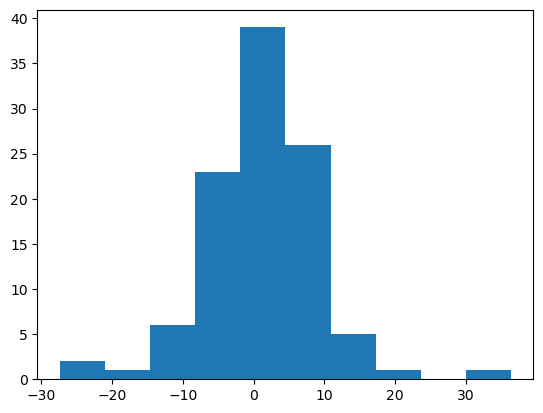

In [113]:
plt.hist(y_predict-y_test)

<AxesSubplot:xlabel='house price of unit area', ylabel='Density'>

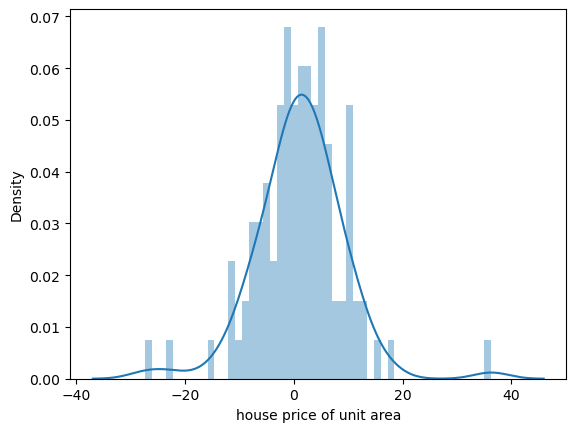

In [114]:
sns.distplot(y_predict-y_test,kde=True,bins=50)